# 그레빌 보정 Tutorial

import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

세팅

    - 9차항
    - 10~100세의 위험률을 가지고 있다고 가정

In [2]:
degree = 9
r = int((degree-1)/2)
num_observed = 90
num_edges = 10

print(f"{degree}차 그레빌 보정 실시")
print(f"예제 데이터 길이 : {num_observed}")

9차 그레빌 보정 실시
예제 데이터 길이 : 90


Greville 보정 9차항 계수

In [3]:
coefficient = np.array([-0.040724,-0.009872,0.11847,0.266557, \
    0.331139,0.266557,0.11847,-0.009872,-0.040724])
coefficient_edge = np.array([1.32613, 0.114696, -0.287231, -0.180078])

assert len(coefficient) == degree
assert len(coefficient_edge) == r

예제 데이터

$\vec p = (p_5, p_6, ... p_{99})$

In [4]:
# 데이터 생성
qx = [0.] * num_edges + \
    [0.1221 * np.exp(0.025*i) + np.random.random()/10 \
        for i in range(num_edges, num_observed+num_edges)]
qx = np.array(qx)

In [5]:
for i in range(8, 14):
    print(f"qx({i}) = {qx[i]}")

qx(8) = 0.0
qx(9) = 0.0
qx(10) = 0.16785573575111054
qx(11) = 0.24423763164896994
qx(12) = 0.18734229699293817
qx(13) = 0.24062369493686026


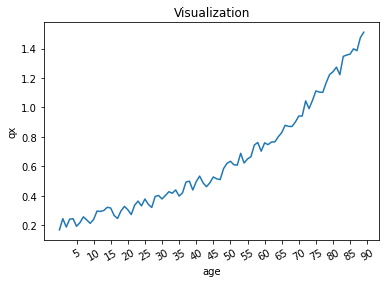

In [6]:
# 시각화
plt.plot(qx[num_edges:])
plt.xticks(range(r+1, num_observed+r+1)[::5], rotation = 30)
plt.title("Visualization")
plt.xlabel("age")
plt.ylabel("qx")
plt.show()

말단값

$(q_0, q_1, q_2, q_3, q_4)$ 예측

In [7]:
# 말단값 계산
for i in range(num_edges)[::-1]:
    qx[i] = np.dot(coefficient_edge, qx[i+1:i+r+1])

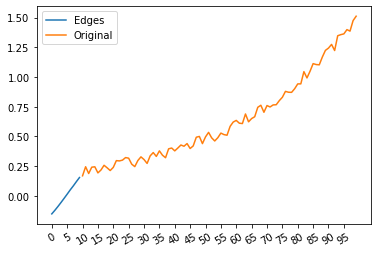

In [8]:
# 시각화 
plt.plot(range(num_edges), qx[:num_edges], label = "Edges")
plt.plot(range(num_edges, num_observed+num_edges), qx[num_edges:], label = "Original")
plt.xticks(range(num_observed+num_edges)[::5], rotation = 30)
plt.legend(loc = "best")
plt.show()

평활화

In [9]:
smoothed_qx = np.zeros_like(qx)
for i in range(num_edges+num_observed):
    if i<r:
        smoothed_qx[i] = qx[i]
    elif i<num_edges+num_observed-r:
        smoothed_qx[i] = np.dot(coefficient, qx[i-r:i+r+1])
    else:
        smoothed_qx[i] = qx[i]

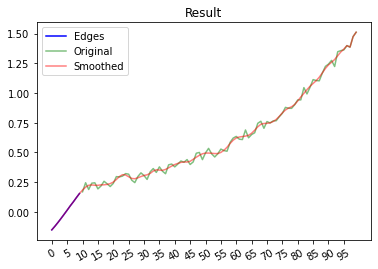

In [10]:
# 시각화
plt.plot(range(num_edges), qx[:num_edges], c = "b", alpha=1, label="Edges")
plt.plot(range(num_edges, num_edges + num_observed), qx[num_edges:], c = "g", alpha=0.5, label = "Original")
plt.plot(range(num_edges+num_observed), smoothed_qx, c = "r", alpha=0.5, label="Smoothed")
plt.xticks(range(num_edges+num_observed)[::5], rotation = 30)
plt.legend(loc = 'best')
plt.title('Result')
plt.show()

저장

In [11]:
df = pd.DataFrame({
    'Edges' : np.concatenate((qx[:num_edges], np.zeros(num_observed))),
    'Original' : np.concatenate((np.zeros(num_edges), qx[num_edges:])),
    'Smoothed' : smoothed_qx
})
df.index = df.index.set_names(['t'])

df.to_csv("Example.csv", index = False)

df.head(10)

,Edges,Original,Smoothed
t,,,
0,-0.152568,0.0,-0.152568
1,-0.122470,0.0,-0.122470
2,-0.090376,0.0,-0.090376
3,-0.056645,0.0,-0.056645
4,-0.021874,0.0,-0.021865
5,0.013361,0.0,0.013369
6,0.049481,0.0,0.049469
7,0.083064,0.0,0.083068
8,0.118885,0.0,0.118883
